<h1>EDA for ML project</h1>

<h2>COVID Dataset</h2>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline

In [2]:
filepath = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
data = pd.read_csv(filepath)
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
data.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
171340,ZWE,Africa,Zimbabwe,2022-03-22,244685.0,0.0,253.714,5429.0,0.0,1.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
171341,ZWE,Africa,Zimbabwe,2022-03-23,244958.0,273.0,186.857,5432.0,3.0,2.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
171342,ZWE,Africa,Zimbabwe,2022-03-24,245194.0,236.0,220.571,5432.0,0.0,2.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
171343,ZWE,Africa,Zimbabwe,2022-03-25,245645.0,451.0,233.286,5436.0,4.0,2.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
171344,ZWE,Africa,Zimbabwe,2022-03-26,245645.0,NaN,NaN,5436.0,0.0,1.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [3]:
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])
print("Column names:", data.columns.tolist())
print("Data types:", data.dtypes)

Number of rows: 171345
Number of columns: 67
Column names: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_p

In [6]:
data.location.value_counts()

Argentina       816
Mexico          816
Thailand        813
Taiwan          801
High income     795
               ... 
Palau           217
Turkmenistan    190
Tuvalu          179
Tokelau         114
Pitcairn         85
Name: location, Length: 238, dtype: int64

In [7]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.680810e+05,1.678950e+05,1.658900e+05,1.500650e+05,150077.000000,147937.000000,167302.000000,167116.000000,165117.000000,149299.000000,...,109173.000000,107676.000000,70566.000000,127298.000000,159970.000000,140224.000000,5.887000e+03,5887.000000,5887.000000,5887.000000
mean,2.710396e+06,1.214518e+04,1.215498e+04,5.942918e+04,169.191422,170.839629,32188.771195,176.970397,176.238248,528.617666,...,10.644431,32.782960,50.780083,3.028354,73.568902,0.725503,3.877151e+04,9.592443,15.966856,1015.021238
std,1.668846e+07,8.772656e+04,8.590398e+04,3.110638e+05,824.702622,809.803911,58202.595277,724.915479,564.624763,807.372405,...,10.581317,13.522885,31.812394,2.449292,7.491124,0.149947,1.072453e+05,16.396660,29.848246,1457.447317
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.145000e+03,1.000000e+00,7.000000e+00,8.300000e+01,0.000000,0.143000,656.276000,0.033000,1.630000,19.705000,...,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000,-5.250000e+01,-0.570000,-0.630000,-23.271271
50%,2.850000e+04,7.900000e+01,1.078570e+02,8.130000e+02,2.000000,2.429000,5030.792500,11.440500,19.251000,137.689000,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,3.623900e+03,6.290000,7.350000,491.674236
75%,3.167000e+05,1.076000e+03,1.171821e+03,7.565000e+03,19.000000,21.143000,40923.021000,103.154500,124.493000,751.097000,...,19.300000,41.300000,83.056250,4.000000,78.930000,0.845000,2.674190e+04,14.670000,22.980000,1694.477812
max,4.801096e+08,4.115815e+06,3.445531e+06,6.121153e+06,18021.000000,14689.286000,706541.904000,51427.491000,16052.608000,6358.085000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.111864e+06,111.010000,375.000000,9339.469641


In [8]:
data.isnull().sum().sort_values()

iso_code                                        0
location                                        0
date                                            0
population                                   1096
total_cases                                  3264
                                            ...  
excess_mortality_cumulative_absolute       165458
excess_mortality                           165458
excess_mortality_cumulative_per_million    165458
weekly_icu_admissions_per_million          165732
weekly_icu_admissions                      165732
Length: 67, dtype: int64

In [9]:
df = data[['location','date','total_cases','new_cases','total_deaths','new_deaths','icu_patients',
                     'hosp_patients','new_tests','total_tests','positive_rate','new_vaccinations',
                     'total_vaccinations','people_vaccinated','people_fully_vaccinated',
                     'total_boosters','population']]
df.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,new_tests,total_tests,positive_rate,new_vaccinations,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population
0,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
1,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
2,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
3,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
4,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0


In [10]:
df = df.fillna(0)
df.groupby('location').mean()

,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,new_tests,total_tests,positive_rate,new_vaccinations,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population
location,,,,,,,,,,,,,,,
Afghanistan,8.175137e+04,232.715223,3.560378e+03,10.048556,0.000000,0.0,0.000000,3.473081e+03,0.012664,1.803412e+01,1.473627e+05,1.222155e+05,9.618979e+04,0.000000e+00,3.983543e+07
Africa,4.460033e+06,14847.040103,1.095179e+05,325.148771,0.000000,0.0,0.000000,0.000000e+00,0.000000,8.273158e+05,8.185823e+07,5.198388e+07,3.333635e+07,8.269750e+05,1.373486e+09
Albania,1.006982e+05,359.247043,1.639043e+03,4.587385,0.000000,0.0,2098.664915,4.809362e+05,0.167527,1.862932e+03,3.847388e+05,1.954121e+05,1.611753e+05,8.157285e+03,2.872934e+06
Algeria,1.171030e+05,349.042050,3.295196e+03,9.031537,21.261498,0.0,0.000000,3.029606e+02,0.000000,2.244231e+02,3.139896e+05,1.787392e+05,1.296930e+05,3.424834e+03,4.461663e+07
Andorra,1.159517e+04,52.600000,9.625960e+01,0.205298,0.000000,0.0,0.000000,1.826981e+04,0.087995,6.360265e+00,3.040591e+03,1.586600e+03,1.142225e+03,5.567020e+01,7.735400e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,3.241469e+02,0.866412,4.742366e+00,0.013359,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,6.729847e+02,3.661641e+02,3.068206e+02,0.000000e+00,1.109400e+04
World,1.365714e+08,602454.822642,2.684476e+06,7656.523270,0.000000,0.0,0.000000,0.000000e+00,0.000000,1.465299e+07,2.752519e+09,1.417956e+09,1.063456e+09,1.510932e+08,7.874966e+09
Yemen,5.223081e+03,16.486034,1.069554e+03,2.991620,0.000000,0.0,0.000000,9.206480e+02,0.000000,0.000000e+00,1.473032e+04,1.194380e+04,5.264527e+03,0.000000e+00,3.049064e+07


In [41]:
df.isnull().sum().sort_values()

location                   0
people_fully_vaccinated    0
people_vaccinated          0
total_vaccinations         0
new_vaccinations           0
positive_rate              0
total_tests                0
total_boosters             0
new_tests                  0
icu_patients               0
new_deaths                 0
total_deaths               0
new_cases                  0
total_cases                0
date                       0
hosp_patients              0
population                 0
dtype: int64

In [11]:
df.groupby('location').median()

,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,new_tests,total_tests,positive_rate,new_vaccinations,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population
location,,,,,,,,,,,,,,,
Afghanistan,55905.5,78.0,2451.0,3.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,3.983543e+07
Africa,3945600.0,11074.0,105216.0,267.0,0.0,0.0,0.0,0.0,0.0000,178234.0,4808377.0,4283815.0,624742.0,0.0,1.373486e+09
Albania,115442.0,161.0,2002.0,3.0,0.0,0.0,1967.0,268924.0,0.1624,0.0,0.0,0.0,0.0,0.0,2.872934e+06
Algeria,114851.0,228.0,3028.0,7.0,22.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,4.461663e+07
Andorra,11266.0,11.0,113.0,0.0,0.0,0.0,0.0,0.0,0.0631,0.0,0.0,0.0,0.0,0.0,7.735400e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,454.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,1.109400e+04
World,112129917.0,458960.0,2549476.0,7408.0,0.0,0.0,0.0,0.0,0.0000,5317700.0,221948798.0,130821012.0,44070961.0,1079.0,7.874966e+09
Yemen,4658.5,6.0,924.0,1.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,3.049064e+07


In [12]:
data.groupby('location').agg(['mean', 'median'])

total_cases                   new_cases            \
                           mean       median           mean    median   
location                                                                
Afghanistan        8.175137e+04      55905.5     233.327632      78.0   
Africa             4.465810e+06    3950577.5   14847.040103   11074.0   
Albania            1.024483e+05     119233.0     365.490642     167.5   
Algeria            1.171030e+05     114851.0     349.042050     228.0   
Andorra            1.159517e+04      11266.0      52.809840      12.0   
...                         ...          ...            ...       ...   
Wallis and Futuna  3.241469e+02        454.0       0.866412       0.0   
World              1.365714e+08  112129917.0  602454.822642  458960.0   
Yemen              5.223081e+03       4658.5      16.509091       6.0   
Zambia             1.094470e+05      86535.0     428.282815     106.0   
Zimbabwe           6.942436e+04      36717.0     334.219048      60.0   

                  new_cases_smoothed               total_deaths             \
                                mean       median          mean     median   
location                                                                     
Afghanistan               238.575841      83.0710  3.696196e+03     2466.5   
Africa                  14942.669962   11205.4290  1.130272e+05   108671.0   
Albania                   368.180585     249.2860  1.672000e+03     2114.0   
Algeria                   351.768397     236.4290  3.365965e+03     3053.0   
Andorra                    52.683103      25.9285  9.887891e+01      114.0   
...                              ...          ...           ...        ...   
Wallis and Futuna           0.874799       0.0000  6.698113e+00        7.0   
World                  601316.047242  464519.7140  2.684476e+06  2549476.0   
Yemen                      16.694969       7.1430  1.100289e+03     1070.5   
Zambia                    431.302660     125.4290  1.706445e+03     1201.0   
Zimbabwe                  338.679112      87.2860  2.069902e+03     1517.0   

                    new_deaths          ... human_development_index         \
                          mean  median  ...                    mean median   
location                                ...                                  
Afghanistan          10.431880     4.0  ...                   0.511  0.511   
Africa              325.148771   267.0  ...                     NaN    NaN   
Albania               4.679625     3.5  ...                   0.795  0.795   
Algeria               9.225503     8.0  ...                   0.748  0.748   
Andorra               0.211172     0.0  ...                   0.868  0.868   
...                        ...     ...  ...                     ...    ...   
Wallis and Futuna     0.018868     0.0  ...                     NaN    NaN   
World              7656.523270  7408.0  ...                   0.737  0.737   
Yemen                 3.077586     1.0  ...                   0.470  0.470   
Zambia                5.477901     1.0  ...                   0.584  0.584   
Zimbabwe              7.405995     1.0  ...                   0.571  0.571   

                  excess_mortality_cumulative_absolute           \
                                                  mean   median   
location                                                          
Afghanistan                                        NaN      NaN   
Africa                                             NaN      NaN   
Albania                                    6467.626087   6384.8   
Algeria                                   19133.290909  20171.7   
Andorra                                      64.900000     66.1   
...                                                ...      ...   
Wallis and Futuna                                  NaN      NaN   
World                                              NaN      NaN   
Yemen                                              NaN      NaN   
Zambia 

In [13]:
df_filter = df['location']=='World'
df_world = df[df_filter]
df_world = df_world[['date','total_cases','new_cases','total_deaths','new_deaths','total_vaccinations',
                     'new_vaccinations','people_vaccinated','people_fully_vaccinated','total_boosters','population']]
df_world = df_world.fillna(0)
df_world.tail()

,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,new_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population
169148,2022-03-22,474114550.0,1998171.0,6098771.0,4919.0,1.111865e+10,20191389.0,5.048169e+09,4.506885e+09,1.598663e+09,7.874966e+09
169149,2022-03-23,475758392.0,1643842.0,6104376.0,5605.0,1.113481e+10,21038671.0,5.052028e+09,4.510655e+09,1.602367e+09,7.874966e+09
169150,2022-03-24,477339647.0,1581260.0,6109654.0,5303.0,1.115153e+10,19109573.0,5.055915e+09,4.514279e+09,1.617721e+09,7.874966e+09
169151,2022-03-25,479004631.0,1664984.0,6118501.0,8850.0,1.116071e+10,16825742.0,5.057672e+09,4.515557e+09,1.619172e+09,7.874966e+09
169152,2022-03-26,480109650.0,1105019.0,6121153.0,2652.0,1.116699e+10,18495823.0,5.060419e+09,4.517988e+09,1.619958e+09,7.874966e+09


In [14]:
df_world_copy = df_world.copy()
df_world_copy.to_csv("df_world.csv")
stats_df = df_world.describe()
stats_df

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,new_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population
count,7.950000e+02,7.950000e+02,7.950000e+02,795.000000,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02,7.950000e+02
mean,1.365714e+08,6.024548e+05,2.684476e+06,7656.523270,2.752519e+09,1.465299e+07,1.417956e+09,1.063456e+09,1.510932e+08,7.874966e+09
std,1.269060e+08,6.697625e+05,2.012836e+06,3685.195976,3.716775e+09,1.605423e+07,1.855669e+09,1.555504e+09,3.729004e+08,0.000000e+00
min,5.570000e+02,0.000000e+00,1.700000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.874966e+09
25%,1.951373e+07,2.476875e+05,7.589375e+05,5447.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.874966e+09
50%,1.121299e+08,4.589600e+05,2.549476e+06,7408.000000,2.219488e+08,5.317700e+06,1.308210e+08,4.407096e+07,1.079000e+03,7.874966e+09
75%,2.234412e+08,6.556475e+05,4.603305e+06,10077.500000,5.648751e+09,3.014317e+07,3.279440e+09,2.329198e+09,2.313538e+07,7.874966e+09
max,4.801096e+08,4.115815e+06,6.121153e+06,18021.000000,1.116699e+10,5.449601e+07,5.060419e+09,4.517988e+09,1.619958e+09,7.874966e+09


In [15]:
#stats_df = df_world.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,new_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population
mean,1.365714e+08,6.024548e+05,2.684476e+06,7656.52327,2.752519e+09,1.465299e+07,1.417956e+09,1.063456e+09,1.510932e+08,7.874966e+09
25%,1.951373e+07,2.476875e+05,7.589375e+05,5447.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.874966e+09
median,1.121299e+08,4.589600e+05,2.549476e+06,7408.00000,2.219488e+08,5.317700e+06,1.308210e+08,4.407096e+07,1.079000e+03,7.874966e+09
75%,2.234412e+08,6.556475e+05,4.603305e+06,10077.50000,5.648751e+09,3.014317e+07,3.279440e+09,2.329198e+09,2.313538e+07,7.874966e+09
range,4.801091e+08,4.115815e+06,6.121136e+06,18021.00000,1.116699e+10,5.449601e+07,5.060419e+09,4.517988e+09,1.619958e+09,0.000000e+00


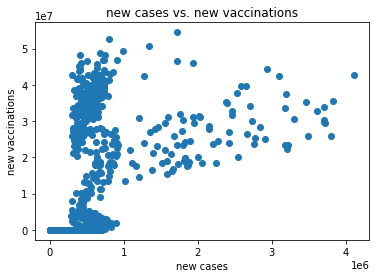

In [16]:
plt.scatter(df_world['new_cases'], df_world['new_vaccinations'])
plt.xlabel("new cases")
plt.ylabel("new vaccinations")
plt.title("new cases vs. new vaccinations")
plt.show()

In [17]:
df_filter1 = df_world['date']>='2020-12-01'
df_world1 = df_world[df_filter1]
df_world1.head(5)

,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,new_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population
168672,2020-12-01,64019400.0,624844.0,1538676.0,12759.0,0.0,0.0,0.0,0.0,0.0,7.874966e+09
168673,2020-12-02,64664686.0,645286.0,1551319.0,12643.0,0.0,0.0,0.0,0.0,0.0,7.874966e+09
168674,2020-12-03,65357601.0,692915.0,1563919.0,12600.0,0.0,0.0,0.0,0.0,0.0,7.874966e+09
168675,2020-12-04,66047271.0,689670.0,1576379.0,12460.0,1.0,0.0,1.0,0.0,0.0,7.874966e+09
168676,2020-12-05,66694363.0,647092.0,1586717.0,10338.0,1.0,0.0,1.0,0.0,0.0,7.874966e+09


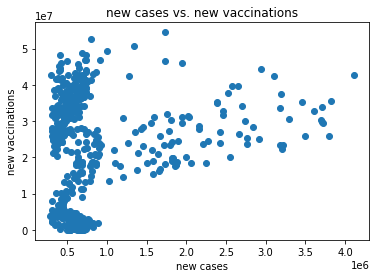

In [18]:
plt.scatter(df_world1['new_cases'], df_world1['new_vaccinations'])
plt.xlabel("new cases")
plt.ylabel("new vaccinations")
plt.title("new cases vs. new vaccinations")
plt.show()

In [19]:
scipy.stats.pearsonr(df_world1['new_cases'], df_world1['new_vaccinations'])

(0.14429304036374216, 0.0015088310156081077)

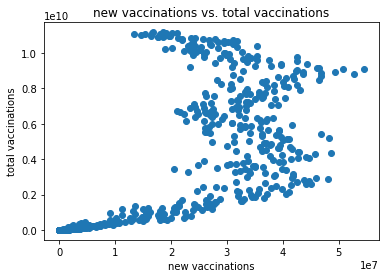

In [20]:
plt.scatter(df_world1['new_vaccinations'], df_world1['total_vaccinations'])
plt.xlabel("new vaccinations")
plt.ylabel("total vaccinations")
plt.title("new vaccinations vs. total vaccinations")
plt.show()

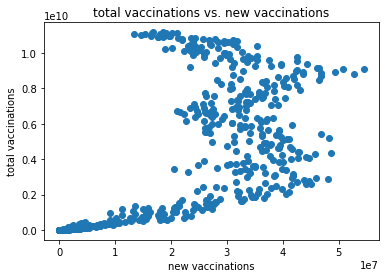

In [21]:
ax = plt.axes()

ax.scatter(df_world1.new_vaccinations, df_world1.total_vaccinations)

# Label the axes
ax.set(xlabel="new vaccinations",
       ylabel="total vaccinations",
       title="total vaccinations vs. new vaccinations");

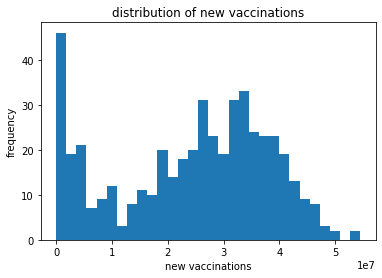

In [22]:
ax = plt.axes()
ax.hist(df_world1.new_vaccinations, bins=30);

ax.set(xlabel="new vaccinations", 
       ylabel="frequency",
       title="distribution of new vaccinations");

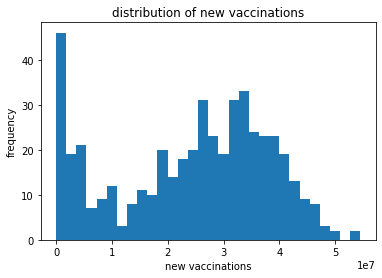

In [23]:
ax = df_world1.new_vaccinations.plot.hist(bins=30)

ax.set(xlabel="new vaccinations", 
       ylabel="frequency",
       title="distribution of new vaccinations");

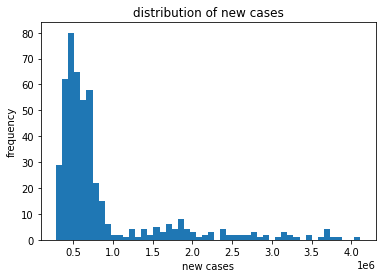

In [24]:
ax = df_world1.new_cases.plot.hist(bins=50)

ax.set(xlabel="new cases", 
       ylabel="frequency",
       title="distribution of new cases");

In [25]:
mask = df_world1.dtypes == np.float
float_cols = df_world1.columns[mask]
skew_vals = df_world1[float_cols].skew()
skew_vals

total_cases                0.835011
new_cases                  2.305152
total_deaths              -0.250560
new_deaths                 0.409015
total_vaccinations         0.277850
new_vaccinations          -0.340213
people_vaccinated          0.066427
people_fully_vaccinated    0.362618
total_boosters             1.789234
population                 0.000000
dtype: float64

In [26]:
skew_limit = 0.75
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

,Skew
new_cases,2.305152
total_boosters,1.789234
total_cases,0.835011


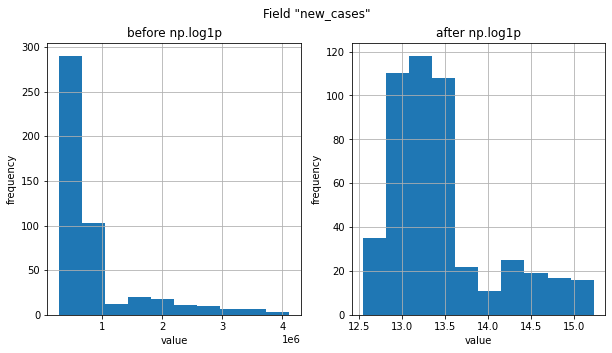

In [27]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "new_cases"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

# Create a histogram on the "ax_before" subplot
df_world1[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df_world1[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [28]:
df_world1['new_cases'].skew()

2.3051519618832494

In [29]:
df_world1['new_cases'].apply(np.log1p).skew()

1.2278306474853935

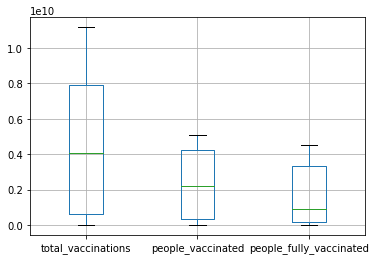

In [30]:
df_world2 = df_world1[['date','total_vaccinations','people_vaccinated','people_fully_vaccinated']]
df_world2.boxplot();

In [31]:
scipy.stats.pearsonr(df_world1['new_vaccinations'], df_world1['total_vaccinations'])

(0.5711402980616247, 5.4442993075384956e-43)

In [32]:
df_world1['date_s'] = pd.to_datetime(df_world1['date'])
df_world1['date_delta'] = (df_world1['date_s'] - df_world1['date_s'].min())  / np.timedelta64(1,'D')
df_world1.tail()

/home/alexandr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/alexandr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,new_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,date_s,date_delta
169148,2022-03-22,474114550.0,1998171.0,6098771.0,4919.0,1.111865e+10,20191389.0,5.048169e+09,4.506885e+09,1.598663e+09,7.874966e+09,2022-03-22,476.0
169149,2022-03-23,475758392.0,1643842.0,6104376.0,5605.0,1.113481e+10,21038671.0,5.052028e+09,4.510655e+09,1.602367e+09,7.874966e+09,2022-03-23,477.0
169150,2022-03-24,477339647.0,1581260.0,6109654.0,5303.0,1.115153e+10,19109573.0,5.055915e+09,4.514279e+09,1.617721e+09,7.874966e+09,2022-03-24,478.0
169151,2022-03-25,479004631.0,1664984.0,6118501.0,8850.0,1.116071e+10,16825742.0,5.057672e+09,4.515557e+09,1.619172e+09,7.874966e+09,2022-03-25,479.0
169152,2022-03-26,480109650.0,1105019.0,6121153.0,2652.0,1.116699e+10,18495823.0,5.060419e+09,4.517988e+09,1.619958e+09,7.874966e+09,2022-03-26,480.0


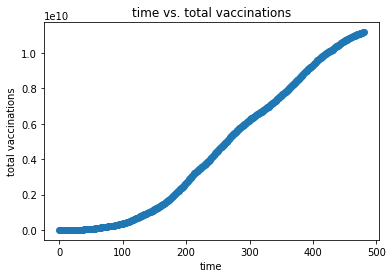

In [33]:
plt.scatter(df_world1['date_delta'], df_world1['total_vaccinations'])
plt.xlabel("time")
plt.ylabel("total vaccinations")
plt.title("time vs. total vaccinations")
plt.show()

In [36]:
scipy.stats.pearsonr(df_world1['date_delta'], df_world1['total_vaccinations'])

(0.9851331822270074, 0.0)

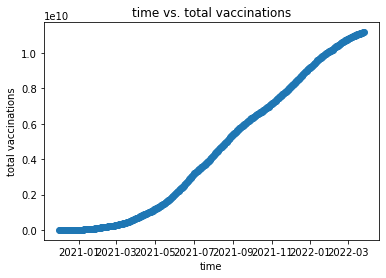

In [37]:
plt.scatter(df_world1['date_s'], df_world1['total_vaccinations'])
plt.xlabel("time")
plt.ylabel("total vaccinations")
plt.title("time vs. total vaccinations")
plt.show()

In [38]:
df_world1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 168672 to 169152
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     481 non-null    object        
 1   total_cases              481 non-null    float64       
 2   new_cases                481 non-null    float64       
 3   total_deaths             481 non-null    float64       
 4   new_deaths               481 non-null    float64       
 5   total_vaccinations       481 non-null    float64       
 6   new_vaccinations         481 non-null    float64       
 7   people_vaccinated        481 non-null    float64       
 8   people_fully_vaccinated  481 non-null    float64       
 9   total_boosters           481 non-null    float64       
 10  population               481 non-null    float64       
 11  date_s                   481 non-null    datetime64[ns]
 12  date_delta               481

In [39]:
df_world1.isnull().sum().sort_values()

date                       0
total_cases                0
new_cases                  0
total_deaths               0
new_deaths                 0
total_vaccinations         0
new_vaccinations           0
people_vaccinated          0
people_fully_vaccinated    0
total_boosters             0
population                 0
date_s                     0
date_delta                 0
dtype: int64

In [42]:
df2 = data[['location','date','total_cases','new_cases','total_deaths','new_deaths', 'new_vaccinations',
                     'total_vaccinations','people_vaccinated','people_fully_vaccinated',
                     'total_boosters','population']]
df2.head()

,location,date,total_cases,new_cases,total_deaths,new_deaths,new_vaccinations,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population
0,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
1,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
2,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
3,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
4,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0


In [43]:
df2 = df2.fillna(0)
df2.groupby('location').mean()

,total_cases,new_cases,total_deaths,new_deaths,new_vaccinations,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population
location,,,,,,,,,,
Afghanistan,8.175137e+04,232.715223,3.560378e+03,10.048556,1.803412e+01,1.473627e+05,1.222155e+05,9.618979e+04,0.000000e+00,3.983543e+07
Africa,4.460033e+06,14847.040103,1.095179e+05,325.148771,8.273158e+05,8.185823e+07,5.198388e+07,3.333635e+07,8.269750e+05,1.373486e+09
Albania,1.006982e+05,359.247043,1.639043e+03,4.587385,1.862932e+03,3.847388e+05,1.954121e+05,1.611753e+05,8.157285e+03,2.872934e+06
Algeria,1.171030e+05,349.042050,3.295196e+03,9.031537,2.244231e+02,3.139896e+05,1.787392e+05,1.296930e+05,3.424834e+03,4.461663e+07
Andorra,1.159517e+04,52.600000,9.625960e+01,0.205298,6.360265e+00,3.040591e+03,1.586600e+03,1.142225e+03,5.567020e+01,7.735400e+04
...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,3.241469e+02,0.866412,4.742366e+00,0.013359,0.000000e+00,6.729847e+02,3.661641e+02,3.068206e+02,0.000000e+00,1.109400e+04
World,1.365714e+08,602454.822642,2.684476e+06,7656.523270,1.465299e+07,2.752519e+09,1.417956e+09,1.063456e+09,1.510932e+08,7.874966e+09
Yemen,5.223081e+03,16.486034,1.069554e+03,2.991620,0.000000e+00,1.473032e+04,1.194380e+04,5.264527e+03,0.000000e+00,3.049064e+07
